### Сначала нужно ознакомиться с данными, с каждой таблицей  [Ссылка](#shag_1)
### подготовить для анализа таблицу сообщений,  [Ссылка](#shag_2_sms)
### подготовить для анализа таблицу интернета,  [Ссылка](#shag_2_mb)
### подготовить для анализа таблицу звонков,  [Ссылка](#shag_2_calls)
### рассчитать доход на каждого клиента,  [Ссылка](#shag_3)
### посчитать среднее количество, дисперсию и стандартное отклонение по каждому из тарифов по использованию минут, мегабайт и сообщений. Построить гистограммы. Описать распределения.  [Ссылка](#shag_4)
### проверить гипотезы.  [Ссылка](#shag_5)
### и придти к каким-то выводам.  [Ссылка](#shag_6)

1. Загрузка и знакомство с данными  [Ссылка](#shag_1)
2. Подготовка датафрейма сообщений для анализа  [Ссылка](#shag_2_sms)

1. [Загрузка и знакомство с данными](#shag_1)
2. [Подготовка датафрейма сообщений для анализа ](#shag_2_sms)

<a id='shag_1'></a>

## Для начала загрузим библиотеки, данные и откроем таблицы.

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import datetime
from scipy import stats as st
from scipy.stats import bartlett

In [2]:
path = '/datasets/calls.csv'
calls_table = pd.read_csv(path, sep=',')
path = '/datasets/internet.csv'
internet_table = pd.read_csv(path, sep=',')
path = '/datasets/messages.csv'
messages_table = pd.read_csv(path, sep=',')
path = '/datasets/tariffs.csv'
tariffs_table = pd.read_csv(path, sep=',')
path = '/datasets/users.csv'
users_table = pd.read_csv(path, sep=',')
display(calls_table)
print(calls_table.info())
display(internet_table)
print(internet_table.info())
display(messages_table)
print(internet_table.info())
display(tariffs_table)
print(tariffs_table.info())
display(users_table)
print(users_table.info())

print(users_table['city'].value_counts())
display(messages_table.sort_values('message_date', ascending=True))

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
None


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
None


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes
None


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None
Москва             99
Санкт-Петербург    39
Новосибирск        16
Омск               14
Казань             14
                   ..
Химки               1
Нижневартовск       1
Иваново             1
Подольск            1
Архангельск         1
Name: city, Length: 76, dtype: int64


,id,message_date,user_id
35693,1155_82,2018-01-02,1155
112561,1453_586,2018-01-02,1453
112248,1453_273,2018-01-02,1453
36021,1155_410,2018-01-02,1155
13096,1055_62,2018-01-02,1055
...,...,...,...
52443,1231_1064,2018-12-31,1231
14184,1060_21,2018-12-31,1060
31402,1139_37,2018-12-31,1139
89442,1373_454,2018-12-31,1373


Типы объектов меня устраивают. Из пропущенных только значения churn_date, что, согласно условиям, говорит о продолжении использования тарифа. Период данных - это 2018 год, т.е. значения месяца не будут дублироваться у разных лет, если мы их будем использовать. 
По мегабайтам и минутам для дальнейшей работы потребуется округление в большую сторону.

In [3]:
internet_table['mb_used']%1

0         0.95
1         0.81
2         0.26
3         0.27
4         0.56
          ... 
149391    0.90
149392    0.13
149393    0.00
149394    0.32
149395    0.37
Name: mb_used, Length: 149396, dtype: float64

In [4]:
internet_table['ostatok_mb'] = internet_table['mb_used']%1
internet_table['mb'] = internet_table['mb_used']//1
internet_table['mb']= internet_table.loc[internet_table['ostatok_mb'] > 0,'mb'] + 1
internet_table = internet_table.query('mb > 0')
display(internet_table)
calls_table['ostatok_min'] = calls_table['duration']%1
calls_table['minuts'] = calls_table['duration']//1
calls_table['minuts']= calls_table.loc[calls_table['ostatok_min'] > 0,'minuts'] + 1
calls_table = calls_table.query('minuts > 0')
display(calls_table)

,Unnamed: 0,id,mb_used,session_date,user_id,ostatok_mb,mb
0,0,1000_0,112.95,2018-11-25,1000,0.95,113.0
1,1,1000_1,1052.81,2018-09-07,1000,0.81,1053.0
2,2,1000_2,1197.26,2018-06-25,1000,0.26,1198.0
3,3,1000_3,550.27,2018-08-22,1000,0.27,551.0
4,4,1000_4,302.56,2018-09-24,1000,0.56,303.0
...,...,...,...,...,...,...,...
149390,149390,1499_151,752.72,2018-10-11,1499,0.72,753.0
149391,149391,1499_152,318.90,2018-10-03,1499,0.90,319.0
149392,149392,1499_153,490.13,2018-12-14,1499,0.13,491.0
149394,149394,1499_155,1246.32,2018-11-26,1499,0.32,1247.0


,id,call_date,duration,user_id,ostatok_min,minuts
2,1000_2,2018-06-11,2.85,1000,0.85,3.0
3,1000_3,2018-09-21,13.80,1000,0.80,14.0
4,1000_4,2018-12-15,5.18,1000,0.18,6.0
7,1000_7,2018-08-22,18.31,1000,0.31,19.0
8,1000_8,2018-09-15,18.44,1000,0.44,19.0
...,...,...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499,0.76,1.0
202603,1499_216,2018-10-18,18.83,1499,0.83,19.0
202604,1499_217,2018-11-10,10.81,1499,0.81,11.0
202605,1499_218,2018-10-06,4.27,1499,0.27,5.0


<div class="alert alert-info">  Оставляя данные больше нуля я, с одной сторроны, избавляюсь от Nan, с другой стороны, уменьшаю размер таблиц для последующих слияний и расчетов сумм использованный минут от нулевых значений. </div>

<a id='shag_2_sms'></a>

## Теперь разберемся с таблицей сообщений.

In [5]:
print(messages_table.info())
messages_table['month'] = pd.DatetimeIndex(messages_table['message_date']).month
messages_t = pd.pivot_table(messages_table,index=['user_id','month'], values=['id'], aggfunc='count')
messages_t.columns = ['count']
display(messages_t)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
None


count
user_id month       
1000    5         22
        6         60
        7         75
        8         81
        9         57
...              ...
1498    10        42
1499    9         11
        10        48
        11        59
        12        66

[2717 rows x 1 columns]

In [6]:
#display(users_table)
users_t = pd.pivot_table(users_table,index=['user_id'], values=['tariff'], aggfunc='count')
display(users_t.sort_values('tariff', ascending=True))

,tariff
user_id,
1000,1
1341,1
1340,1
1339,1
1338,1
...,...
1159,1
1158,1
1157,1


У каждого пользователя только один тариф. 

In [7]:
messages_t.reset_index(inplace=True)
messages_t = messages_t.merge(users_table[['user_id','tariff']], how = 'left', on = 'user_id')
display(messages_t)

,user_id,month,count,tariff
0,1000,5,22,ultra
1,1000,6,60,ultra
2,1000,7,75,ultra
3,1000,8,81,ultra
4,1000,9,57,ultra
...,...,...,...,...
2712,1498,10,42,smart
2713,1499,9,11,smart
2714,1499,10,48,smart
2715,1499,11,59,smart


In [8]:
tariffs_table['tariff'] = tariffs_table['tariff_name']
#result = pd.merge(messages_t, tariffs_table, on=['tariff'], how='inner')
#display(result)
messages_t.reset_index(inplace=True)
messages_result = messages_t.merge(tariffs_table[['messages_included','rub_per_message','tariff','rub_monthly_fee']], how = 'left', on = 'tariff')
messages_result.reset_index(inplace=True)

In [9]:
messages_r = messages_result
messages_r['sum_sms_rub'] = (messages_r['count']-messages_r['messages_included'])*messages_r['rub_per_message']
display(messages_r)
messages_r = messages_r.query('sum_sms_rub > 0')
display(messages_r)

,level_0,index,user_id,month,count,tariff,messages_included,rub_per_message,rub_monthly_fee,sum_sms_rub
0,0,0,1000,5,22,ultra,1000,1,1950,-978
1,1,1,1000,6,60,ultra,1000,1,1950,-940
2,2,2,1000,7,75,ultra,1000,1,1950,-925
3,3,3,1000,8,81,ultra,1000,1,1950,-919
4,4,4,1000,9,57,ultra,1000,1,1950,-943
...,...,...,...,...,...,...,...,...,...,...
2712,2712,2712,1498,10,42,smart,50,3,550,-24
2713,2713,2713,1499,9,11,smart,50,3,550,-117
2714,2714,2714,1499,10,48,smart,50,3,550,-6
2715,2715,2715,1499,11,59,smart,50,3,550,27


,level_0,index,user_id,month,count,tariff,messages_included,rub_per_message,rub_monthly_fee,sum_sms_rub
30,30,30,1005,3,56,smart,50,3,550,18
34,34,34,1005,7,56,smart,50,3,550,18
35,35,35,1005,8,64,smart,50,3,550,42
36,36,36,1005,9,52,smart,50,3,550,6
38,38,38,1005,11,51,smart,50,3,550,3
...,...,...,...,...,...,...,...,...,...,...
2665,2665,2665,1490,7,62,smart,50,3,550,36
2705,2705,2705,1496,12,51,smart,50,3,550,3
2710,2710,2710,1498,8,62,smart,50,3,550,36
2715,2715,2715,1499,11,59,smart,50,3,550,27


In [10]:
messages_r = pd.pivot_table(messages_r,index=['tariff'], values=['sum_sms_rub'], aggfunc='sum')
display(messages_r)

,sum_sms_rub
tariff,
smart,38784


По отправленным сообщения из лимита вышли только по тарифу smart. За сообщения сверх тарифа заплачено 38784 руб.

<a id='shag_2_mb'></a>

## Теперь разберемся с таблицей интернета.

In [11]:
display(internet_table)
internet_table['month'] = pd.DatetimeIndex(internet_table['session_date']).month
internet_t = pd.pivot_table(internet_table,index=['user_id','month'], values=['mb'], aggfunc='sum')
internet_t.columns = ['sum']
display(internet_t)

,Unnamed: 0,id,mb_used,session_date,user_id,ostatok_mb,mb
0,0,1000_0,112.95,2018-11-25,1000,0.95,113.0
1,1,1000_1,1052.81,2018-09-07,1000,0.81,1053.0
2,2,1000_2,1197.26,2018-06-25,1000,0.26,1198.0
3,3,1000_3,550.27,2018-08-22,1000,0.27,551.0
4,4,1000_4,302.56,2018-09-24,1000,0.56,303.0
...,...,...,...,...,...,...,...
149390,149390,1499_151,752.72,2018-10-11,1499,0.72,753.0
149391,149391,1499_152,318.90,2018-10-03,1499,0.90,319.0
149392,149392,1499_153,490.13,2018-12-14,1499,0.13,491.0
149394,149394,1499_155,1246.32,2018-11-26,1499,0.32,1247.0


sum
user_id month         
1000    5       2256.0
        6      23257.0
        7      14016.0
        8      14070.0
        9      14581.0
...                ...
1498    10     20604.0
1499    9       1848.0
        10     17809.0
        11     17984.0
        12     13077.0

[3200 rows x 1 columns]

Посмотрим, в какие месяцы пользователи каких тарифов вышли за рамки лимитов по использованию интернета и во сколько это им обошлось.

In [12]:
internet_t.reset_index(inplace=True)
internet_result = internet_t.merge(users_table[['user_id','tariff']], how = 'left', on = 'user_id')
display(internet_result)

,user_id,month,sum,tariff
0,1000,5,2256.0,ultra
1,1000,6,23257.0,ultra
2,1000,7,14016.0,ultra
3,1000,8,14070.0,ultra
4,1000,9,14581.0,ultra
...,...,...,...,...
3195,1498,10,20604.0,smart
3196,1499,9,1848.0,smart
3197,1499,10,17809.0,smart
3198,1499,11,17984.0,smart


In [13]:
tariffs_table['rub_per_mb'] = tariffs_table['rub_per_gb']/1024
internet_result = internet_result.merge(tariffs_table[['mb_per_month_included','rub_per_mb','tariff','rub_monthly_fee']], how = 'left', on = 'tariff')
display(internet_result)

,user_id,month,sum,tariff,mb_per_month_included,rub_per_mb,rub_monthly_fee
0,1000,5,2256.0,ultra,30720,0.146484,1950
1,1000,6,23257.0,ultra,30720,0.146484,1950
2,1000,7,14016.0,ultra,30720,0.146484,1950
3,1000,8,14070.0,ultra,30720,0.146484,1950
4,1000,9,14581.0,ultra,30720,0.146484,1950
...,...,...,...,...,...,...,...
3195,1498,10,20604.0,smart,15360,0.195312,550
3196,1499,9,1848.0,smart,15360,0.195312,550
3197,1499,10,17809.0,smart,15360,0.195312,550
3198,1499,11,17984.0,smart,15360,0.195312,550


In [14]:
internet_r = internet_result
internet_r['summa_mb_rub'] = (internet_r['sum']-internet_r['mb_per_month_included'])*internet_r['rub_per_mb']
internet_r.loc[:,'summa_mb_rub'] = internet_r.loc[internet_r['summa_mb_rub'] > 0]
display(internet_r)
internet_r = internet_r.query('summa_mb_rub > 0')
display(internet_r)

,user_id,month,sum,tariff,mb_per_month_included,rub_per_mb,rub_monthly_fee,summa_mb_rub
0,1000,5,2256.0,ultra,30720,0.146484,1950,NaN
1,1000,6,23257.0,ultra,30720,0.146484,1950,NaN
2,1000,7,14016.0,ultra,30720,0.146484,1950,NaN
3,1000,8,14070.0,ultra,30720,0.146484,1950,NaN
4,1000,9,14581.0,ultra,30720,0.146484,1950,NaN
...,...,...,...,...,...,...,...,...
3195,1498,10,20604.0,smart,15360,0.195312,550,1024.218750
3196,1499,9,1848.0,smart,15360,0.195312,550,NaN
3197,1499,10,17809.0,smart,15360,0.195312,550,478.320312
3198,1499,11,17984.0,smart,15360,0.195312,550,512.500000


,user_id,month,sum,tariff,mb_per_month_included,rub_per_mb,rub_monthly_fee,summa_mb_rub
8,1001,11,18452.0,smart,15360,0.195312,550,603.906250
11,1002,7,17601.0,smart,15360,0.195312,550,437.695312
12,1002,8,19801.0,smart,15360,0.195312,550,867.382812
13,1002,9,15878.0,smart,15360,0.195312,550,101.171875
15,1002,11,18610.0,smart,15360,0.195312,550,634.765625
...,...,...,...,...,...,...,...,...
3193,1498,8,23390.0,smart,15360,0.195312,550,1568.359375
3194,1498,9,21979.0,smart,15360,0.195312,550,1292.773438
3195,1498,10,20604.0,smart,15360,0.195312,550,1024.218750
3197,1499,10,17809.0,smart,15360,0.195312,550,478.320312


In [15]:
internet_r = pd.pivot_table(internet_r,index=['tariff'], values=['summa_mb_rub'], aggfunc='sum')
display(internet_r)

,summa_mb_rub
tariff,
smart,1.154021e+06
ultra,1.015061e+05


По интернет-трафику из лимита вышли пользователи по обоим тарифам. За мегабайты сверх тарифа smart заплачено 1 154 021 руб. За мегабайты сверх тарифа ultra заплачено 101 506 руб.

<a id='shag_2_calls'></a>

## Теперь разберемся с таблицей звонков.

In [16]:
print(calls_table.info())
display(calls_table)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 161447 entries, 2 to 202606
Data columns (total 6 columns):
id             161447 non-null object
call_date      161447 non-null object
duration       161447 non-null float64
user_id        161447 non-null int64
ostatok_min    161447 non-null float64
minuts         161447 non-null float64
dtypes: float64(3), int64(1), object(2)
memory usage: 8.6+ MB
None


,id,call_date,duration,user_id,ostatok_min,minuts
2,1000_2,2018-06-11,2.85,1000,0.85,3.0
3,1000_3,2018-09-21,13.80,1000,0.80,14.0
4,1000_4,2018-12-15,5.18,1000,0.18,6.0
7,1000_7,2018-08-22,18.31,1000,0.31,19.0
8,1000_8,2018-09-15,18.44,1000,0.44,19.0
...,...,...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499,0.76,1.0
202603,1499_216,2018-10-18,18.83,1499,0.83,19.0
202604,1499_217,2018-11-10,10.81,1499,0.81,11.0
202605,1499_218,2018-10-06,4.27,1499,0.27,5.0


In [17]:
calls_table['month'] = pd.DatetimeIndex(calls_table['call_date']).month
calls_t = pd.pivot_table(calls_table,index=['user_id','month'], values=['minuts'], aggfunc='sum')
calls_t.columns = ['sum']
display(calls_t)

sum
user_id month       
1000    5      159.0
        6      172.0
        7      340.0
        8      395.0
        9      463.0
...              ...
1498    10     245.0
1499    9       70.0
        10     437.0
        11     612.0
        12     492.0

[3168 rows x 1 columns]

Посмотрим, в какие месяцы пользователи каких тарифов вышли за рамки тарифов по минутам и во сколько это им обошлось.

In [18]:
calls_result = calls_t.merge(users_table[['user_id','tariff']], how = 'left', on = 'user_id')
display(calls_result)

,user_id,sum,tariff
0,1000,159.0,ultra
1,1000,172.0,ultra
2,1000,340.0,ultra
3,1000,395.0,ultra
4,1000,463.0,ultra
...,...,...,...
3163,1498,245.0,smart
3164,1499,70.0,smart
3165,1499,437.0,smart
3166,1499,612.0,smart


In [19]:
calls_result.reset_index(inplace=True)
calls_result = calls_result.merge(tariffs_table[['minutes_included','rub_per_minute','tariff','rub_monthly_fee']], how = 'left', on = 'tariff')
calls_result.reset_index(inplace=True)
display(calls_result)

,level_0,index,user_id,sum,tariff,minutes_included,rub_per_minute,rub_monthly_fee
0,0,0,1000,159.0,ultra,3000,1,1950
1,1,1,1000,172.0,ultra,3000,1,1950
2,2,2,1000,340.0,ultra,3000,1,1950
3,3,3,1000,395.0,ultra,3000,1,1950
4,4,4,1000,463.0,ultra,3000,1,1950
...,...,...,...,...,...,...,...,...
3163,3163,3163,1498,245.0,smart,500,3,550
3164,3164,3164,1499,70.0,smart,500,3,550
3165,3165,3165,1499,437.0,smart,500,3,550
3166,3166,3166,1499,612.0,smart,500,3,550


In [20]:
calls_result['summa_min_rub'] = (calls_result['sum']-calls_result['minutes_included'])*calls_result['rub_per_minute']
calls_r = calls_result.query('summa_min_rub > 0')

In [21]:
сalls_r = pd.pivot_table(calls_r,index=['tariff'], values=['summa_min_rub'], aggfunc='sum')
display(сalls_r)

,summa_min_rub
tariff,
smart,265440.0


По минутам из лимита вышли пользователи только тарифа smart. За минуты сверх тарифа smart заплачено 265 440 руб.

<a id='shag_3'></a>

## Рассчитаем доход с каждого клиента

In [22]:
calls_t.reset_index(inplace=True)
messages_t.reset_index(inplace=True)
internet_t.reset_index(inplace=True)
value_table = users_table.merge(calls_t, how = 'outer', on = 'user_id')
value_table.rename({'sum': 'min_per_month'}, axis=1, inplace=True)

In [23]:
value_table = value_table.merge(messages_t, how = 'outer', on = ['user_id','month','tariff'])
value_table.rename({'count': 'messages_per_month'}, axis=1, inplace=True)

In [24]:
value_table = value_table.merge(internet_t, how = 'outer', on = ['user_id','month'])
value_table.rename({'sum': 'mb_per_month'}, axis=1, inplace=True)

In [25]:
display(value_table)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,min_per_month,level_0,index_x,messages_per_month,index_y,mb_per_month
0,1000,52.0,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5.0,159.0,0.0,0.0,22.0,0.0,2256.0
1,1000,52.0,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6.0,172.0,1.0,1.0,60.0,1.0,23257.0
2,1000,52.0,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7.0,340.0,2.0,2.0,75.0,2.0,14016.0
3,1000,52.0,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8.0,395.0,3.0,3.0,81.0,3.0,14070.0
4,1000,52.0,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9.0,463.0,4.0,4.0,57.0,4.0,14581.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3217,1489,NaN,NaN,NaN,NaN,NaN,NaN,smart,10.0,NaN,2659.0,2659.0,21.0,3137.0,18250.0
3218,1489,NaN,NaN,NaN,NaN,NaN,NaN,smart,11.0,NaN,2660.0,2660.0,20.0,3138.0,17516.0
3219,1489,NaN,NaN,NaN,NaN,NaN,NaN,smart,12.0,NaN,2661.0,2661.0,35.0,3139.0,17341.0
3220,1240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,1516.0,961.0


In [26]:
value_table.dropna(inplace=True,subset=['tariff'])
display(value_table)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,min_per_month,level_0,index_x,messages_per_month,index_y,mb_per_month
0,1000,52.0,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5.0,159.0,0.0,0.0,22.0,0.0,2256.0
1,1000,52.0,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6.0,172.0,1.0,1.0,60.0,1.0,23257.0
2,1000,52.0,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7.0,340.0,2.0,2.0,75.0,2.0,14016.0
3,1000,52.0,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8.0,395.0,3.0,3.0,81.0,3.0,14070.0
4,1000,52.0,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9.0,463.0,4.0,4.0,57.0,4.0,14581.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3215,1489,NaN,NaN,NaN,NaN,NaN,NaN,smart,8.0,NaN,2657.0,2657.0,17.0,3135.0,11066.0
3216,1489,NaN,NaN,NaN,NaN,NaN,NaN,smart,9.0,NaN,2658.0,2658.0,32.0,3136.0,17232.0
3217,1489,NaN,NaN,NaN,NaN,NaN,NaN,smart,10.0,NaN,2659.0,2659.0,21.0,3137.0,18250.0
3218,1489,NaN,NaN,NaN,NaN,NaN,NaN,smart,11.0,NaN,2660.0,2660.0,20.0,3138.0,17516.0


In [27]:
value_table.rename({'tariff_y': 'tariff'}, axis=1, inplace=True)
value_table = value_table.merge(tariffs_table, how = 'left', on = ['tariff'])

In [28]:
print(value_table.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3220 entries, 0 to 3219
Data columns (total 24 columns):
user_id                  3220 non-null int64
age                      3176 non-null float64
churn_date               189 non-null object
city                     3176 non-null object
first_name               3176 non-null object
last_name                3176 non-null object
reg_date                 3176 non-null object
tariff                   3220 non-null object
month                    3212 non-null float64
min_per_month            3168 non-null float64
level_0                  2717 non-null float64
index_x                  2717 non-null float64
messages_per_month       2717 non-null float64
index_y                  3198 non-null float64
mb_per_month             3198 non-null float64
messages_included        3220 non-null int64
mb_per_month_included    3220 non-null int64
minutes_included         3220 non-null int64
rub_monthly_fee          3220 non-null int64
rub_per_gb       

In [29]:
value_table['dohod_min_temp']=(value_table['min_per_month']-value_table['minutes_included'])*value_table['rub_per_minute']
value_table['dohod_mb_temp']=(value_table['mb_per_month']-value_table['mb_per_month_included'])*value_table['rub_per_gb']/2014
value_table['dohod_sms_temp']=(value_table['messages_per_month']-value_table['messages_included'])*value_table['rub_per_message']


In [30]:
value_table['dohod_min']=0
value_table['dohod_mb']=0
value_table['dohod_sms']=0
display(value_table[['dohod_min','dohod_mb','dohod_sms']])

,dohod_min,dohod_mb,dohod_sms
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
3215,0,0,0
3216,0,0,0
3217,0,0,0
3218,0,0,0


In [31]:
value_table['dohod_min']=value_table.loc[value_table['dohod_min_temp']>0]['dohod_min_temp']
value_table['dohod_mb']=value_table.loc[value_table['dohod_mb_temp']>0]['dohod_mb_temp']
value_table['dohod_sms']=value_table.loc[value_table['dohod_sms_temp']>0]['dohod_sms_temp']
value_table['dohod_min'].fillna(0, inplace=True)
value_table['dohod_mb'].fillna(0, inplace=True)
value_table['dohod_sms'].fillna(0, inplace=True)
display(value_table[['dohod_min','dohod_mb','dohod_sms']])

,dohod_min,dohod_mb,dohod_sms
0,0.0,0.000000,0.0
1,0.0,0.000000,0.0
2,0.0,0.000000,0.0
3,0.0,0.000000,0.0
4,0.0,0.000000,0.0
...,...,...,...
3215,0.0,0.000000,0.0
3216,0.0,185.898709,0.0
3217,0.0,286.991063,0.0
3218,0.0,214.101291,0.0


In [32]:
value_table['dohod']=value_table['dohod_min']+value_table['dohod_mb']+value_table['dohod_sms']+value_table['rub_monthly_fee']

In [33]:
display(value_table['dohod'])

0       1950.000000
1       1950.000000
2       1950.000000
3       1950.000000
4       1950.000000
           ...     
3215     550.000000
3216     735.898709
3217     836.991063
3218     764.101291
3219     746.722939
Name: dohod, Length: 3220, dtype: float64

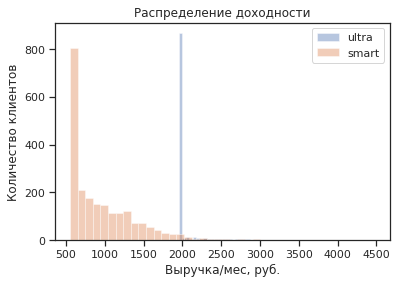

In [34]:
plt.title('Распределение доходности')
plt.ylabel('Количество клиентов')
for tariff in ['ultra', 'smart']:
    sns.distplot(value_table.query('tariff == @tariff')['dohod'], kde=False, label=tariff).set_xlabel('Выручка/мес, руб.')
_ = plt.legend(['ultra', 'smart'])

Распределение по тарифу smart происходит по Пуассону. Каждый пользователь тратит в месяц разную сумму, в зависимости от выхода за рамки лимита. По тарифу ultra траты пользователей составляют ежемесячную плату по тарифу.

<a id='shag_4'></a>

## Посчитаем среднее количество, дисперсию и стандартное отклонение по каждому из тарифов по использованию минут, мегабайт и сообщений. Построим гистограммы. Опишем распределения.

Сколько в среднем каждому пользователю требуется сообщений в месяц?

In [35]:
display(messages_result)
messages_mean_table = pd.DataFrame(messages_result.groupby('user_id')['count'].mean())
display(messages_mean_table)

,level_0,index,user_id,month,count,tariff,messages_included,rub_per_message,rub_monthly_fee,sum_sms_rub
0,0,0,1000,5,22,ultra,1000,1,1950,-978
1,1,1,1000,6,60,ultra,1000,1,1950,-940
2,2,2,1000,7,75,ultra,1000,1,1950,-925
3,3,3,1000,8,81,ultra,1000,1,1950,-919
4,4,4,1000,9,57,ultra,1000,1,1950,-943
...,...,...,...,...,...,...,...,...,...,...
2712,2712,2712,1498,10,42,smart,50,3,550,-24
2713,2713,2713,1499,9,11,smart,50,3,550,-117
2714,2714,2714,1499,10,48,smart,50,3,550,-6
2715,2715,2715,1499,11,59,smart,50,3,550,27


,count
user_id,
1000,62.0
1002,10.0
1003,76.0
1004,149.0
1005,46.0
...,...
1495,68.0
1496,39.0
1497,17.0


Сколько в среднем каждому пользователю требуется мегабайт в месяц?

In [36]:
display(internet_result)
internet_mean_table = pd.DataFrame(internet_result.groupby('user_id')['sum'].mean())
display(internet_mean_table)

,user_id,month,sum,tariff,mb_per_month_included,rub_per_mb,rub_monthly_fee,summa_mb_rub
0,1000,5,2256.0,ultra,30720,0.146484,1950,NaN
1,1000,6,23257.0,ultra,30720,0.146484,1950,NaN
2,1000,7,14016.0,ultra,30720,0.146484,1950,NaN
3,1000,8,14070.0,ultra,30720,0.146484,1950,NaN
4,1000,9,14581.0,ultra,30720,0.146484,1950,NaN
...,...,...,...,...,...,...,...,...
3195,1498,10,20604.0,smart,15360,0.195312,550,1024.218750
3196,1499,9,1848.0,smart,15360,0.195312,550,NaN
3197,1499,10,17809.0,smart,15360,0.195312,550,478.320312
3198,1499,11,17984.0,smart,15360,0.195312,550,512.500000


,sum
user_id,
1000,13436.500000
1001,16252.500000
1002,16351.142857
1003,11465.800000
1004,18505.625000
...,...
1495,25234.400000
1496,22492.750000
1497,15016.666667


Сколько каждому пользователю требуется в среднем минут в месяц?

In [37]:
display(calls_result)
calls_mean_table = pd.DataFrame(calls_result.groupby('user_id')['sum'].mean())
display(calls_mean_table)

,level_0,index,user_id,sum,tariff,minutes_included,rub_per_minute,rub_monthly_fee,summa_min_rub
0,0,0,1000,159.0,ultra,3000,1,1950,-2841.0
1,1,1,1000,172.0,ultra,3000,1,1950,-2828.0
2,2,2,1000,340.0,ultra,3000,1,1950,-2660.0
3,3,3,1000,395.0,ultra,3000,1,1950,-2605.0
4,4,4,1000,463.0,ultra,3000,1,1950,-2537.0
...,...,...,...,...,...,...,...,...,...
3163,3163,3163,1498,245.0,smart,500,3,550,-765.0
3164,3164,3164,1499,70.0,smart,500,3,550,-1290.0
3165,3165,3165,1499,437.0,smart,500,3,550,-189.0
3166,3166,3166,1499,612.0,smart,500,3,550,336.0


,sum
user_id,
1000,318.750000
1001,422.000000
1002,213.714286
1003,762.000000
1004,121.875000
...,...
1495,766.800000
1496,494.916667
1497,468.666667


In [38]:
total_mean_table = users_table.merge(messages_mean_table, how = 'left', on = 'user_id')
total_mean_table.rename({'count': 'messages_per_month'}, axis=1, inplace=True)
total_mean_table = total_mean_table.merge(internet_mean_table, how = 'left', on = 'user_id')
total_mean_table.rename({'sum': 'mb_per_month'}, axis=1, inplace=True)
total_mean_table = total_mean_table.merge(calls_mean_table, how = 'left', on = 'user_id')
total_mean_table.rename({'sum': 'min_per_month'}, axis=1, inplace=True)
display(total_mean_table)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_per_month,mb_per_month,min_per_month
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,62.0,13436.500000,318.750000
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart,NaN,16252.500000,422.000000
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,10.0,16351.142857,213.714286
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra,76.0,11465.800000,762.000000
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,149.0,18505.625000,121.875000
...,...,...,...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra,68.0,25234.400000,766.800000
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart,39.0,22492.750000,494.916667
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart,17.0,15016.666667,468.666667
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,42.0,18364.750000,322.750000


In [39]:
total_mean_table.fillna({'messages_per_month':0,'mb_per_month':0,'min_per_month':0}, inplace=True)
display(total_mean_table)


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_per_month,mb_per_month,min_per_month
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,62.0,13436.500000,318.750000
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart,0.0,16252.500000,422.000000
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,10.0,16351.142857,213.714286
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra,76.0,11465.800000,762.000000
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,149.0,18505.625000,121.875000
...,...,...,...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra,68.0,25234.400000,766.800000
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart,39.0,22492.750000,494.916667
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart,17.0,15016.666667,468.666667
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,42.0,18364.750000,322.750000


Среднее количество сообщений в месяц по тарифу smart = 32
Среднее количество сообщений в месяц по тарифу ultra = 54
Дисперсия по количеству сообщений в месяц по тарифу smart = 701.13
Дисперсия по количеству сообщений в месяц по тарифу ultra = 2150.56
Стандартное отклонение по количеству сообщений в месяц по тарифу smart = 26.48
Стандартное отклонение сообщений в месяц по тарифу ultra = 46.37


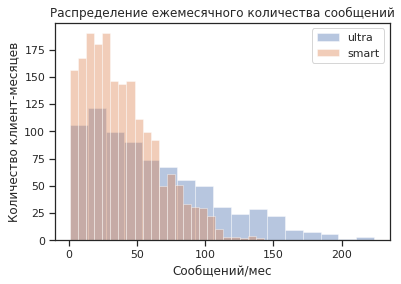

In [40]:
plt.title('Распределение ежемесячного количества сообщений')
plt.ylabel('Количество клиент-месяцев')
for tariff in ['ultra', 'smart']:
    sns.distplot(messages_t.query('tariff == @tariff')['count'], kde=False, label=tariff).set_xlabel('Сообщений/мес')
_ = plt.legend(['ultra', 'smart'])
print('Среднее количество сообщений в месяц по тарифу smart =', round(total_mean_table.loc[total_mean_table['tariff']=='smart']['messages_per_month'].describe()['mean']))
print('Среднее количество сообщений в месяц по тарифу ultra =', round(total_mean_table.loc[total_mean_table['tariff']=='ultra']['messages_per_month'].describe()['mean']))

print('Дисперсия по количеству сообщений в месяц по тарифу smart =', 
      round(total_mean_table.loc[total_mean_table['tariff']=='smart']['messages_per_month'].var(ddof=1),2))
print('Дисперсия по количеству сообщений в месяц по тарифу ultra =', 
      round(total_mean_table.loc[total_mean_table['tariff']=='ultra']['messages_per_month'].var(ddof=1),2))

print('Стандартное отклонение по количеству сообщений в месяц по тарифу smart =', 
      round(total_mean_table.loc[total_mean_table['tariff']=='smart']['messages_per_month'].describe()['std'],2))
print('Стандартное отклонение сообщений в месяц по тарифу ultra =', 
      round(total_mean_table.loc[total_mean_table['tariff']=='ultra']['messages_per_month'].describe()['std'],2))

Среднее количество сообщений в месяц распределено по Пуассону у обоих тарифов.

Среднее количество мегабайт в месяц по тарифу smart = 16030
Среднее количество мегабайт в месяц по тарифу ultra = 19307
Дисперсия по количеству сообщений в месяц по тарифу smart = 13476659.52
Дисперсия по количеству сообщений в месяц по тарифу ultra = 69990846.27
Стандартное отклонение по количеству сообщений в месяц по тарифу smart = 3671.06
Стандартное отклонение сообщений в месяц по тарифу ultra = 8366.05


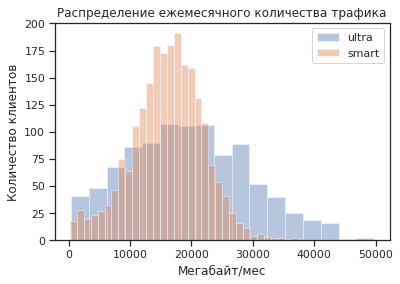

In [41]:
plt.title('Распределение ежемесячного количества трафика')
plt.ylabel('Количество клиентов')
for tariff in ['ultra', 'smart']:
    sns.distplot(internet_result.query('tariff == @tariff')['sum'], kde=False, label=tariff).set_xlabel('Мегабайт/мес')
_ = plt.legend(['ultra', 'smart'])
print('Среднее количество мегабайт в месяц по тарифу smart =', round(total_mean_table.loc[total_mean_table['tariff']=='smart']['mb_per_month'].describe()['mean']))
print('Среднее количество мегабайт в месяц по тарифу ultra =', round(total_mean_table.loc[total_mean_table['tariff']=='ultra']['mb_per_month'].describe()['mean']))

print('Дисперсия по количеству сообщений в месяц по тарифу smart =', round(total_mean_table.loc[total_mean_table['tariff']=='smart']['mb_per_month'].var(ddof=1),2))
print('Дисперсия по количеству сообщений в месяц по тарифу ultra =', round(total_mean_table.loc[total_mean_table['tariff']=='ultra']['mb_per_month'].var(ddof=1),2))

print('Стандартное отклонение по количеству сообщений в месяц по тарифу smart =', round(total_mean_table.loc[total_mean_table['tariff']=='smart']['mb_per_month'].describe()['std'],2))
print('Стандартное отклонение сообщений в месяц по тарифу ultra =', round(total_mean_table.loc[total_mean_table['tariff']=='ultra']['mb_per_month'].describe()['std'],2))

Среднее количество мегабайт в месяц распределено нормально у обоих тарифов. Медиана у тарифа смарт немного ниже.

Среднее количество минут в месяц по тарифу smart = 414
Среднее количество минут в месяц по тарифу ultra = 521
Дисперсия по количеству сообщений в месяц по тарифу smart = 21069.62
Дисперсия по количеству сообщений в месяц по тарифу ultra = 79430.65
Стандартное отклонение по количеству сообщений в месяц по тарифу smart = 145.15
Стандартное отклонение сообщений в месяц по тарифу ultra = 281.83


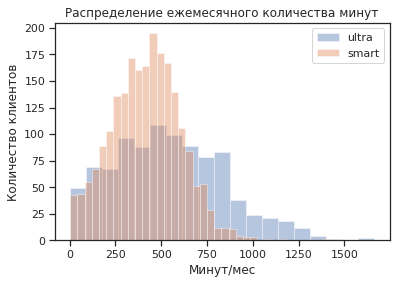

In [42]:
plt.title('Распределение ежемесячного количества минут')
plt.ylabel('Количество клиентов')
for tariff in ['ultra', 'smart']:
    sns.distplot(calls_result.query('tariff == @tariff')['sum'], kde=False, label=tariff).set_xlabel('Минут/мес')
_ = plt.legend(['ultra', 'smart'])
print('Среднее количество минут в месяц по тарифу smart =', round(total_mean_table.loc[total_mean_table['tariff']=='smart']['min_per_month'].describe()['mean']))
print('Среднее количество минут в месяц по тарифу ultra =', round(total_mean_table.loc[total_mean_table['tariff']=='ultra']['min_per_month'].describe()['mean']))

print('Дисперсия по количеству сообщений в месяц по тарифу smart =', 
      round(total_mean_table.loc[total_mean_table['tariff']=='smart']['min_per_month'].var(ddof=1),2))
print('Дисперсия по количеству сообщений в месяц по тарифу ultra =', 
      round(total_mean_table.loc[total_mean_table['tariff']=='ultra']['min_per_month'].var(ddof=1),2))

print('Стандартное отклонение по количеству сообщений в месяц по тарифу smart =', 
      round(total_mean_table.loc[total_mean_table['tariff']=='smart']['min_per_month'].describe()['std'],2))
print('Стандартное отклонение сообщений в месяц по тарифу ultra =', 
      round(total_mean_table.loc[total_mean_table['tariff']=='ultra']['min_per_month'].describe()['std'],2))

Среднее количество минут в месяц распределено нормально у обоих тарифов. Медиана у тарифа смарт немного ниже.

<a id='shag_5'></a>

## Проверим гипотезы

1. Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различается. Распределение выручки нормальное. Нулевая гипотеза будет заключаться в том, что средняя выручка пользователей обоих тарифов равна. Альтернативная гипотеза заключается в том, что средняя выручка пользователей тарифов «Ультра» больше или меньше чем средняя выручка пользователей тарифов «Смарт».

In [47]:
value_ultra = value_table.loc[value_table['tariff']=='ultra']['dohod']
value_smart = value_table.loc[value_table['tariff']=='smart']['dohod']

stat, p = bartlett(value_ultra, value_smart)
p

8.867221225744555e-210

Очень маленькое p-значение предполагает, что совокупности не имеют одинаковой дисперсии.
Поэтому для ttest_ind будем использовать equal_var = False.

In [48]:
alpha = 0.05

results = st.ttest_ind(
    value_ultra, 
    value_smart, equal_var = False) 

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.0
Отвергаем нулевую гипотезу


<div class="alert alert-info"> С помощью теста Барлетта проверил, что дисперсии отличаются, и в дальнейшем использовал значение equal_var = False </div>

Средняя выручка пользователей тарифов smart и ultra не равна.

2. Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов. Нулевая гипотеза будет заключаться в том, что средняя выручка пользователей из Москвы и из регионов равна. Альтернативная гипотеза заключается в том, что средняя выручка пользователей тарифов из Москвы больше или меньше чем средняя выручка пользователей из регионов.

In [49]:
value_Moskow = value_table.loc[value_table['city']=='Москва']['dohod']
value_Ne_Moskow = value_table.loc[value_table['tariff']!='Москва']['dohod']

stat, p = bartlett(value_ultra, value_smart)
p

8.867221225744555e-210

Очень маленькое p-значение предполагает, что совокупности не имеют одинаковой дисперсии.
Поэтому для ttest_ind будем использовать equal_var = False.

In [50]:
alpha = 0.05

results = st.ttest_ind(
    value_Moskow, 
    value_Ne_Moskow,equal_var = False) 

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.11354897232243223
Не получилось отвергнуть нулевую гипотезу


<a id='shag_6'></a>

## Выводы
Средняя выручка тарифов smart и ultra отличаются. 
Подтвердить отличие выручки с пользователей из Москвы от выручки пользователей от регионов не удалось. 
Распределения по использованию мегабайт, сообщений и минут у обоих тарифов очень похоже.
Распределение по тарифу smart происходит по Пуассону. Каждый пользователь тратит в месяц разную сумму, в зависимости от выхода за рамки лимита. По тарифу ultra траты пользователей составляют ежемесячную плату по тарифу.
По минутам и по сообщениям за рамкаи лимита вышли только пользователи тарифа smart. По интернет-трафику у пользователей тарифа ultra выход за рамки лимита в сравнении с пользователями smart незначительный.

<div class="alert alert-info">  Для компании выгоднее развивать тариф ultra </div>